Engineers can collect data in a number of formats. One is simply written. If an engineer has written data, this can be entered maually into a numpy array or pandas dataframe for future analysis. But other data is electronic or digital and saved in a file. Digital data can come from test instruments, robotics, statistical process control and many other areas.

In this post, we will read three different file types into pandas and make a simple plot of each. The three file types are:

.csv (Comma Seperated Values)

.xlsx (Microsoft Excel file)

.json (JavaScript Object Notation)

Each file type requires a different pandas function.

Let's start out with a .csv file. .csv stands for comma seperated values. A .csv file is a type of text file that organizes data into columns and rows.  .csv files have commas, spaces, tabs or other characters to seperate columns, and new lines to seperate rows. To read in a .csv file with pandas, we first need to import pandas. We'll also import matplotlib, numpy and run the matplotlib inline command to show the plots if you are using a Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tensile_test_data.csv', )

In [3]:
df.head()

,1,237.7605198,0
0,2,2439.308739,0.423240
1,3,6043.869097,0.846506
2,4,11220.383850,1.269797
3,5,15944.773140,1.693189
4,6,15542.731450,2.116607


This gives us some strange column names. '237.7605198' is one of the values in the data set, not the column name. We need to specify ```header=None``` as an optional arguemnt, to ensure that pandas doesn't use the first row of our data set as column headers.

In [4]:
df = pd.read_csv('tensile_test_data.csv', header=None)
df.head()

,0,1,2
0,1,237.760520,0.000000
1,2,2439.308739,0.423240
2,3,6043.869097,0.846506
3,4,11220.383850,1.269797
4,5,15944.773140,1.693189


Now for a quick plot. The x-values will be from the 3rd column (which has a header '2') and our y-values will come from the second column (which has a header '1'). Remember that Python starts counting at zero, not 1.

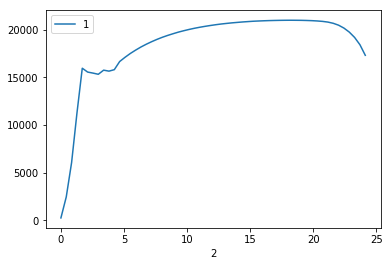

In [5]:
df.plot(x=2, y=1)

Next let's read in an Excel file. Excel files have an .xlsx or .xls file extension. We use the pandas function pd.read_excel(). 

When I tried to run the pd.read_excel() function the first time, I was returned an error:

"ImportError: Install xlrd >= 0.9.0 for Excel support"

To solve this, I went to the Anaconda Prompt and typed:

```
conda install xlrd
```

Once the xlrd module was installed, the pd.read_excel() function worked just fine.


In [6]:
df = pd.read_excel('weather_data.xlsx')
df.head()

,0,0.1,272,0.2,0.3,0.4,0.5,9,26,1,...,1.1,15,224,0.13,0.14,0.15,0.16,0.17,33,33.1
0,61,103,0,2,0,0,0,2,0,68,...,0,0,5,0,0,0,62,-99999,-99999,-99999
1,2,0,17,27,0,10,0,0,30,25,...,26,0,0,9,6,78,0,5,8,0
2,260,1,0,0,0,1,3,0,5,0,...,0,0,0,0,9,35,13,86,0,-99999
3,47,0,0,0,5,115,49,81,0,0,...,0,0,0,0,0,2,0,0,0,0
4,0,0,30,42,0,0,0,0,0,0,...,0,2,2,240,16,35,14,14,8,-99999


Again, we have the problem with the headers. Pandas is using the first row of our excel sheet as the column headers in our dataframe. Including header=None will add sequential column numbers and make the first row of the datafram from the first row of the excel sheet.

In [7]:
df = pd.read_excel('weather_data.xlsx', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,0,272,0,0,0,0,9,26,1,...,1,15,224,0,0,0,0,0,33,33
1,61,103,0,2,0,0,0,2,0,68,...,0,0,5,0,0,0,62,-99999,-99999,-99999
2,2,0,17,27,0,10,0,0,30,25,...,26,0,0,9,6,78,0,5,8,0
3,260,1,0,0,0,1,3,0,5,0,...,0,0,0,0,9,35,13,86,0,-99999
4,47,0,0,0,5,115,49,81,0,0,...,0,0,0,0,0,2,0,0,0,0


In [8]:
df2 = df.transpose()
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,61,2,260,47,0,0,0,0,0,1,0
1,0,103,0,1,0,0,0,45,0,0,163,0
2,272,0,17,0,0,30,0,0,0,0,5,0
3,0,2,27,0,0,42,0,0,0,14,0,0
4,0,0,0,0,5,0,0,0,0,156,0,0


In [9]:
df2.replace(-99999, np.nan, inplace=True)
df2.tail()
#df2.plot()

,0,1,2,3,4,5,6,7,8,9,10,11
26,0,0.0,78,35.0,2,35.0,0,0,6.0,0,2.0,0
27,0,62.0,0,13.0,0,14.0,5,0,138.0,0,0.0,0
28,0,NaN,5,86.0,0,14.0,0,0,58.0,0,0.0,0
29,33,NaN,8,0.0,0,8.0,0,0,10.0,0,0.0,0
30,33,NaN,0,NaN,0,NaN,0,0,NaN,1,NaN,0


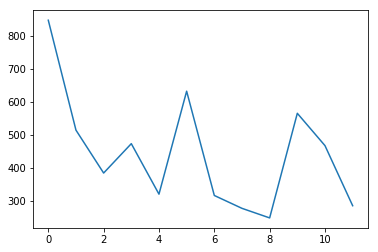

In [10]:
#df.sum()
df2.sum().plot()

In [11]:
df = pd.read_json('json_data.json')

ValueError: No ':' found when decoding object value

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,0,272,0,0,0,0,9,26,1,...,1,15,224,0,0,0,0,0,33,33
1,61,103,0,2,0,0,0,2,0,68,...,0,0,5,0,0,0,62,-99999,-99999,-99999
2,2,0,17,27,0,10,0,0,30,25,...,26,0,0,9,6,78,0,5,8,0
3,260,1,0,0,0,1,3,0,5,0,...,0,0,0,0,9,35,13,86,0,-99999
4,47,0,0,0,5,115,49,81,0,0,...,0,0,0,0,0,2,0,0,0,0
